In [1]:
import json
import jiwer as ji
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Section1: Data Loading

This section is used for pre-processing the dataset.

### 1. DeepSpeech (with optimised alpha beta)

In [2]:
deepspeech_train = pd.DataFrame()
deepspeech_dev = pd.DataFrame()
deepspeech_test = pd.DataFrame()

In [3]:
with open('deepspeech_train.txt', 'r', encoding='utf-8') as file_read:
    data = file_read.read()
    loaded_json = json.loads(data)
    deepspeech_train = pd.DataFrame.from_dict(loaded_json)

with open('deepspeech_dev.txt', 'r', encoding='utf-8') as file_read:
    data = file_read.read()
    loaded_json = json.loads(data)
    deepspeech_dev = pd.DataFrame.from_dict(loaded_json)
    
with open('deepspeech_test.txt', 'r', encoding='utf-8') as file_read:
    data = file_read.read()
    loaded_json = json.loads(data)
    deepspeech_test = pd.DataFrame.from_dict(loaded_json)    

In [4]:
def replacePath(x):
    return x.split("/media/data/LTLab.lan/agarwal/german-speech-corpus/swiss_german/splits_mathias/clips/")[1]

def replacePath2(x):
    return x.split(".wav")[0]

deepspeech_train['wav_filename'] = deepspeech_train['wav_filename'].apply(replacePath)
deepspeech_dev['wav_filename'] = deepspeech_dev['wav_filename'].apply(replacePath)
deepspeech_test['wav_filename'] = deepspeech_test['wav_filename'].apply(replacePath)

deepspeech_train['wav_filename'] = deepspeech_train['wav_filename'].apply(replacePath2)
deepspeech_dev['wav_filename'] = deepspeech_dev['wav_filename'].apply(replacePath2)
deepspeech_test['wav_filename'] = deepspeech_test['wav_filename'].apply(replacePath2)

In [5]:
deepspeech_train['length_ratio'] = deepspeech_train['res'].str.len()/deepspeech_train['src'].str.len()
deepspeech_dev['length_ratio'] = deepspeech_dev['res'].str.len()/deepspeech_dev['src'].str.len()
deepspeech_test['length_ratio'] = deepspeech_test['res'].str.len()/deepspeech_test['src'].str.len()

In [6]:
deepspeech_train = deepspeech_train[['wav_filename', 'src', 'res', 'wer', 'length_ratio']]
deepspeech_train = deepspeech_train.sort_values('wav_filename',ascending=True)
deepspeech_dev = deepspeech_dev[['wav_filename', 'src', 'res', 'wer', 'length_ratio']]
deepspeech_dev = deepspeech_dev.sort_values('wav_filename',ascending=True)
deepspeech_test = deepspeech_test[['wav_filename', 'src', 'res', 'wer', 'length_ratio']]
deepspeech_test = deepspeech_test.sort_values('wav_filename',ascending=True)

In [7]:
deepspeech_test

,wav_filename,src,res,wer,length_ratio
602,10090,aber ich habe etwas mühe für die bdp zu sprech...,ein bis er die bdp zu sprechen es gleich in,0.705882,0.511905
1220,10091,wir unterstützen die motion sie geht in die ri...,wir unterstützen die motion unterstützen die m...,0.500000,1.180328
1184,10092,die antwort des regierungsrats ist eben leider...,die antwort des rates die leider als,0.500000,0.679245
573,10093,es geht nicht um eine doppelte bestrafung der ...,ich eine doppelte bestrafen der taxifahrer ein...,0.714286,0.593407
734,10094,der taxifahrer der vielleicht einmal zu schnel...,der taxifahrer der eichel gefahr gibt den bus ...,0.666667,0.692308
1697,10095,der taxifahrer wird dreimal bestraft und dies ...,der taxifahrer wird dreimal bestraft und das i...,0.230769,0.936842
971,10096,deshalb muss diese kehrtwende kommen und wir k...,aus dieser wenn und kommen und wir können hier...,0.571429,0.956044
188,10097,sie wissen ja welche landessprache die taxifah...,in welcher landessprachen die taxifahrer haben...,0.875000,0.862069
1690,10098,diese leute mit entsprechendem migrationshinte...,leute mit diesem migrationshintergrund sollte ...,0.250000,0.848485
227,10221,unsere fraktion schliesst sich der motion an,in einer motion an ein,0.857143,0.500000


### 2. Jasper

In [8]:
jasper_train = pd.DataFrame()
jasper_dev = pd.DataFrame()
jasper_test = pd.DataFrame()

jasper = pd.DataFrame(columns = ['train', 'dev','test'])

In [9]:
data = []
with open('jasper_train.txt') as f:
    for row_num, line in enumerate(f):
        if line is not '\n':
            try:
                wav_filename = line.split('#')[0].rstrip('\t')
                res = line.split('#')[1].strip('\n').strip('\t').replace("\t", " ")
                match = deepspeech_train[deepspeech_train['wav_filename'].str.match(wav_filename)]
                src = match['src'].iloc[0]
                wer = ji.wer(src, res)
                length_ratio = len(res)/len(src)
                data.append([wav_filename, res, src, wer, length_ratio])
            except:
                print(wav_filename)
jasper_train = pd.DataFrame(data = data, columns = ['wav_filename', 'res', 'src', 'wer', 'length_ratio'])

30492
30461


In [10]:
data = []
with open('jasper_dev.txt') as f:
    for row_num, line in enumerate(f):
        if line is not '\n':
            try:
                wav_filename = line.split('#')[0].rstrip('\t')
                res = line.split('#')[1].strip('\n').strip('\t').replace("\t", " ")
                match = deepspeech_dev[deepspeech_dev['wav_filename'].str.match(wav_filename)]
                src = match['src'].iloc[0]
                wer = ji.wer(src, res)
                length_ratio = len(res)/len(src)
                data.append([wav_filename, res, src, wer, length_ratio])
            except:
                print(wav_filename)
jasper_dev = pd.DataFrame(data = data, columns = ['wav_filename', 'res', 'src', 'wer', 'length_ratio'])

25673
31921
6736
16961
23297
26886
32640
15283
15887
16978
22522
12508
6732
9743


In [11]:
data = []
with open('jasper_test.txt') as f:
    for row_num, line in enumerate(f):
        if line is not '\n':
            try:
                wav_filename = line.split('#')[0].rstrip('\t')
                res = line.split('#')[1].strip('\n').strip('\t').replace("\t", " ")
                match = deepspeech_test[deepspeech_test['wav_filename'].str.match(wav_filename)]
                src = match['src'].iloc[0]
                wer = ji.wer(src, res)
                length_ratio = len(res)/len(src)
                data.append([wav_filename, res, src, wer, length_ratio])
            except:
                print(wav_filename)
jasper_test = pd.DataFrame(data = data, columns = ['wav_filename', 'res', 'src', 'wer', 'length_ratio'])

29472
3319
30907
1526
17699
23046
10994
29547
14885
22438
29979
13995
21704
19806
29470


In [16]:
jasper_train = jasper_train[['wav_filename', 'src', 'res', 'wer', 'length_ratio']]
jasper_train = jasper_train.sort_values('wav_filename',ascending=True)
jasper_dev = jasper_dev[['wav_filename', 'src', 'res', 'wer', 'length_ratio']]
jasper_dev = jasper_dev.sort_values('wav_filename',ascending=True)
jasper_test = jasper_test[['wav_filename', 'src', 'res', 'wer', 'length_ratio']]
jasper_test = jasper_test.sort_values('wav_filename',ascending=True)

In [17]:
jasper_test

,wav_filename,src,res,wer,length_ratio
556,10090,aber ich habe etwas mühe für die bdp zu sprech...,die an bisher die bdp zu sprecherinnen,0.823529,0.452381
701,10091,wir unterstützen die motion sie geht in die ri...,wir unterstützen die motion unterstützen diese...,0.400000,1.327869
283,10092,die antwort des regierungsrats ist eben leider...,die antwort des regierungsrates ist eben leide...,0.125000,1.018868
693,10093,es geht nicht um eine doppelte bestrafung der ...,es geht nicht um eine doppelte bestrafung der ...,0.142857,1.000000
1725,10094,der taxifahrer der vielleicht einmal zu schnel...,der taxifahrer der demnach zu schnell gefahren...,0.500000,0.800905
976,10095,der taxifahrer wird dreimal bestraft und dies ...,der taxifahrer mit dreimal bestraft und ist un...,0.230769,0.894737
1010,10096,deshalb muss diese kehrtwende kommen und wir k...,deshalb muss diese kehrwendung kommen und wir ...,0.142857,0.967033
416,10097,sie wissen ja welche landessprache die taxifah...,wie sie ja welche landessprache die taxifahrer...,0.375000,0.896552
761,10098,diese leute mit entsprechendem migrationshinte...,leute mit diesen migrationshintergrund sollte ...,0.333333,0.808081
251,10221,unsere fraktion schliesst sich der motion an,die dertsch liess sich einer motion,0.714286,0.795455


# Section 2: Analysis

This section is dedicated for data analysis.

### 1. Length Graph

**a. Train**

Blue: DeepSpeech
Orange: Jasper


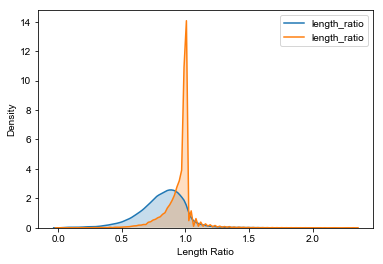

In [18]:
ax = sns.kdeplot(deepspeech_train['length_ratio'], shade=True)
sns.kdeplot(jasper_train['length_ratio'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

print('Blue: DeepSpeech')
print('Orange: Jasper')

**b. Dev**

Blue: DeepSpeech
Orange: Jasper


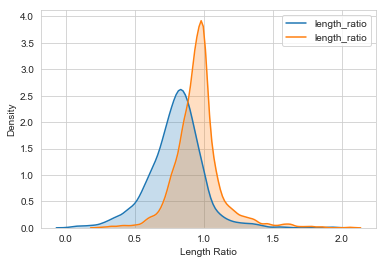

In [19]:
ax = sns.kdeplot(deepspeech_dev['length_ratio'], shade=True)
sns.kdeplot(jasper_dev['length_ratio'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

print('Blue: DeepSpeech')
print('Orange: Jasper')

**c. Test**

Blue: DeepSpeech
Orange: Jasper


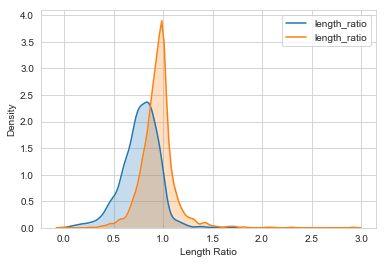

In [20]:
ax = sns.kdeplot(deepspeech_test['length_ratio'], shade=True)
sns.kdeplot(jasper_test['length_ratio'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

print('Blue: DeepSpeech')
print('Orange: Jasper')

**WER Train**

In [21]:
deepspeech_train_no_issue = deepspeech_train[deepspeech_train['length_ratio'] > 0.75]
jasper_train_no_issue = jasper_train[jasper_train['length_ratio'] > 0.75]

In [22]:
#deepspeech
issue_dp = round(deepspeech_train['wer'].mean()*100,2)
no_issue_dp = round(deepspeech_train_no_issue['wer'].mean()*100,2)

#jasper
issue_jp = round(jasper_train['wer'].mean()*100,2)
no_issue_jp = round(jasper_train_no_issue['wer'].mean()*100,2)

In [23]:
data = [["Issue", issue_dp, issue_jp], ["No Issue", no_issue_dp, no_issue_jp]]
df = pd.DataFrame(data, columns=["Index", "Mozilla", "Jasper"])
df.set_index("Index")

,Mozilla,Jasper
Index,,
Issue,53.82,15.88
No Issue,46.26,13.27


**WER Dev**

In [24]:
deepspeech_dev_no_issue = deepspeech_dev[deepspeech_dev['length_ratio'] > 0.75]
jasper_dev_no_issue = jasper_dev[jasper_dev['length_ratio'] > 0.75]

In [25]:
#deepspeech
issue_dp = round(deepspeech_dev['wer'].mean()*100,2)
no_issue_dp = round(deepspeech_dev_no_issue['wer'].mean()*100,2)

#jasper
issue_jp = round(jasper_dev['wer'].mean()*100,2)
no_issue_jp = round(jasper_dev_no_issue['wer'].mean()*100,2)

In [26]:
data = [["Issue", issue_dp, issue_jp], ["No Issue", no_issue_dp, no_issue_jp]]
df = pd.DataFrame(data, columns=["Index", "Mozilla", "Jasper"])
df.set_index("Index")

,Mozilla,Jasper
Index,,
Issue,57.86,41.30
No Issue,51.00,39.66


**WER Test**

In [27]:
deepspeech_test_no_issue = deepspeech_test[deepspeech_test['length_ratio'] > 0.75]
jasper_test_no_issue = jasper_test[jasper_test['length_ratio'] > 0.75]

In [28]:
#deepspeech
issue_dp = round(deepspeech_test['wer'].mean()*100,2)
no_issue_dp = round(deepspeech_test_no_issue['wer'].mean()*100,2)

#jasper
issue_jp = round(jasper_test['wer'].mean()*100,2)
no_issue_jp = round(jasper_test_no_issue['wer'].mean()*100,2)

In [29]:
data = [["Issue", issue_dp, issue_jp], ["No Issue", no_issue_dp, no_issue_jp]]
df = pd.DataFrame(data, columns=["Index", "Mozilla", "Jasper"])
df.set_index("Index")

,Mozilla,Jasper
Index,,
Issue,59.68,44.01
No Issue,51.18,41.90
